In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm

# Project 5: Estimating the Molar Absorption Coefficient of a Dye

To estimate the coefficient $\epsilon$ in Lambert-Beer's law, we consider a series of transmission measurements for a dye, taken at different concentrations.

First, we load the data and visualize it:

In [21]:
conc, trans1, trans2, trans3 = np.loadtxt('project_LB.csv',skiprows=1,delimiter=',',unpack=True)

transmissions = np.array([trans1, trans2, trans3])

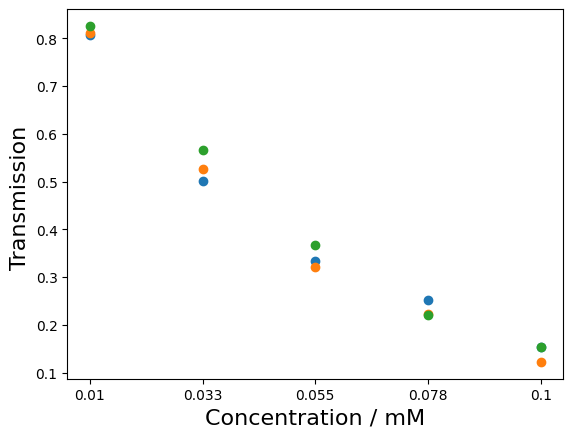

In [22]:
plt.scatter(conc,trans1)
plt.scatter(conc,trans2)
plt.scatter(conc,trans3)

plt.xticks([1.00e-05, 3.25e-05, 5.50e-05, 7.75e-05, 1.00e-04],['0.01', '0.033', '0.055', '0.078', '0.1'])

plt.xlabel('Concentration / mM',fontsize=16)
plt.ylabel('Transmission ',fontsize=16)

#plt.legend()

#plt.xlim([0,0.08])
#plt.ylim([0,25])

plt.show()

Next we need to transform the transmission data to Absorbance, using the negative decadic log of the transmission. Then we can calculate mean and standard deviation. With numpy this can be done in two quick lines:

In [23]:
mean_ext = np.mean(-np.log10(transmissions),axis=0)
std_ext  = np.std(-np.log10(transmissions),axis=0)

Next we fit a linear model to the data using sklearn:

In [24]:
# Data preparation for sklearn
conc_dat = np.array([[c,] for c in conc])

# Calculate the weights
weights = 1./std_ext

# Fitting the model with weights
lin_model = LinearRegression()
lin_model.fit(conc_dat,mean_ext,sample_weight=weights)

# Predicting the values of the regression line
pred_ext_wls = lin_model.predict(conc_dat)

# print the coefficients:
print(f"Slope: {lin_model.coef_[0]} 1/M")
print(f"Intercept: {lin_model.intercept_}")


Slope: 8302.741049240301 1/M
Intercept: 0.005767287162617152


Because scikit learn doesn't provide error estimates on the parameters, we'll repeat the fit with the statsmodels library:

In [25]:
conc_sm = sm.add_constant(conc)
model = sm.WLS(mean_ext, conc_sm, weights=weights)
results = model.fit()

# Print regression results
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5969.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.78e-06
Time:                        16:30:17   Log-Likelihood:                 18.108
No. Observations:                   5   AIC:                            -32.22
Df Residuals:                       3   BIC:                            -33.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.004      1.305      0.2

/Users/hannes/prog/data_analysis/env/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


The parameters of the two fits agree nicely! The molar absorption coefficient is therefore estimated to be 8302.74 +/- 107.45 M$^{-1}$ cm$^{-1}$.

Now we can also plot the regression line and mean data:

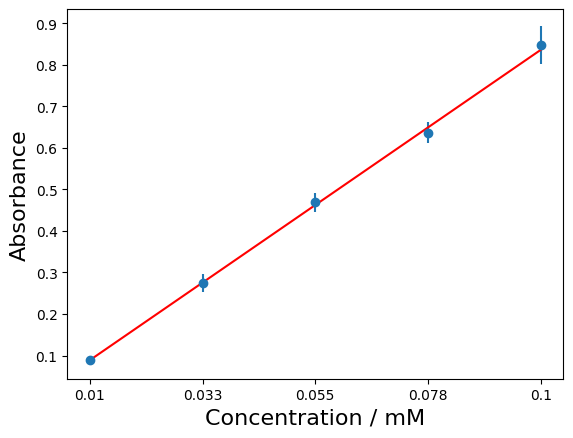

In [26]:
plt.errorbar(conc,mean_ext,yerr=std_ext,fmt='o' )
plt.plot(conc_dat,pred_ext_wls,color='r')

plt.xticks([1.00e-05, 3.25e-05, 5.50e-05, 7.75e-05, 1.00e-04],['0.01', '0.033', '0.055', '0.078', '0.1'])

plt.xlabel('Concentration / mM',fontsize=16)
plt.ylabel('Absorbance',fontsize=16)

plt.show()